import libraries

In [ ]:
import re  # library for regular expression operations
import string  # for string operations
from collections import Counter

import nltk  # Python library for NLP
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords  # module for stop words that come with NLTK
from nltk.corpus import twitter_samples
from nltk.stem import PorterStemmer  # module for stemming
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

read dataset

In [ ]:
df = pd.read_csv('Twitter Sentiments.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31962 non-null  int64 
 1   label          31962 non-null  int64 
 2   tweet          31962 non-null  object
 3   username       31962 non-null  object
 4   mention_count  31962 non-null  int64 
 5   clean_tweet    31962 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


 Define a regular expression to match mentions in tweets then Find all mentions in the tweet then Return the count of mentions

In [ ]:
def count_mentions(tweet):
    mention_pattern = re.compile(r'@(\w+)')
    mentions = re.findall(mention_pattern, tweet)
    return len(mentions)

In [ ]:
real_usernames = df['username'].unique()

Output the number of unique users in the last column

In [ ]:
len(real_usernames)

515

Output the total number of mentions after replacing '@user' with real usernames


In [ ]:
df['mention_count'] = df['tweet'].apply(count_mentions)


Get the total number of mentions across all tweets

In [ ]:
total_mentions = df['mention_count'].sum()

Output the result

In [ ]:
total_mentions

17569

remove twitter handles (@user)

In [ ]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,label,tweet,username,mention_count,clean_tweet
0,1,0,@btcCRa6V when a father is dysfunctional and ...,@dUnGUzgB,1,when a father is dysfunctional and is so sel...
1,2,0,@GXjdL28M @vin30rjc thanks for #lyft credit i ...,@py8K4gKz,2,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,@IlS0vUZH,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,@pacq5VnZ,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,@fJhofnE6,0,factsguide society now #motivation


Summary Statistics of Numeric Columns:

In [ ]:
df.describe()

,id,label,mention_count
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,0.549684
std,9226.778988,0.255397,0.983319
min,1.000000,0.000000,0.000000
25%,7991.250000,0.000000,0.000000
50%,15981.500000,0.000000,0.000000
75%,23971.750000,0.000000,1.000000
max,31962.000000,1.000000,11.000000


remove special characters, numbers and punctuations

In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-18-b3010b8507be>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
df.head()

,id,label,tweet,username,mention_count,clean_tweet
0,1,0,@btcCRa6V when a father is dysfunctional and ...,@dUnGUzgB,1,when a father is dysfunctional and is so sel...
1,2,0,@GXjdL28M @vin30rjc thanks for #lyft credit i ...,@py8K4gKz,2,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,@IlS0vUZH,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,@pacq5VnZ,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,@fJhofnE6,0,factsguide society now #motivation


 Count the number of mentions for each username (node)

In [ ]:
tweets_count = df['username'].value_counts()

mention_counts = Counter()
for tweet in df['tweet']:
    mentions = [mention.strip('@') for mention in tweet.split() if mention.startswith('@')]
    mention_counts.update(mentions)

Identify the top 15 nodes for each criterion

top 15 tweets count:

In [ ]:
tweets_count.head(15)

@5eIWQDr5    89
@k60HAlib    86
@ddeVryG8    84
@bVc5Hp5D    84
@gIAv4Pk7    84
@1hu6MIE6    83
@q0LwbVcI    82
@zZ9S5acL    82
@OlKBjHpR    81
@ACO5Nxch    81
@GN6WdXhd    81
@D77D7GUW    81
@r0DYLQkN    81
@XZ51wJzH    80
@G592sKru    79
Name: username, dtype: int64

top 15 mentioned count:

In [ ]:
top_15_mentions_nodes = [(username, count) for username, count in mention_counts.most_common() if username][:15]
mention_counts = Counter()
for tweet in df['tweet']:
    mentions = [mention.strip('@') for mention in tweet.split() if mention.startswith('@')]
    mention_counts.update(mentions)
[(username, count) for username, count in mention_counts.most_common() if username][:15]

[('IMzbJIs4', 67),
 ('OlKBjHpR', 60),
 ('L6zXZaWe', 57),
 ('qJ3VHvs8', 57),
 ('0jZoe6gH', 55),
 ('iClnvFlX', 55),
 ('ncci0T5N', 55),
 ('NXAyUKkC', 55),
 ('Odf0UvtO', 54),
 ('CDNIQLEA', 54),
 ('mWCHN09K', 53),
 ('HF86N0wj', 53),
 ('XZ51wJzH', 53),
 ('fIURPSAQ', 53),
 ('11GpeE2a', 53)]

 remove short words


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))


In [ ]:
df.head()


,id,label,tweet,username,mention_count,clean_tweet
0,1,0,@btcCRa6V when a father is dysfunctional and ...,@dUnGUzgB,1,when father dysfunctional selfish drags kids i...
1,2,0,@GXjdL28M @vin30rjc thanks for #lyft credit i ...,@py8K4gKz,2,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,@IlS0vUZH,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,@pacq5VnZ,0,#model love take with time
4,5,0,factsguide: society now #motivation,@fJhofnE6,0,factsguide society #motivation


individual words considered as tokens

In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

stem the words

In [ ]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

combine words into single sentence

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,username,mention_count,clean_tweet
0,1,0,@btcCRa6V when a father is dysfunctional and ...,@dUnGUzgB,1,w h e n f a t h e r d y s f u n c t s e ...
1,2,0,@GXjdL28M @vin30rjc thanks for #lyft credit i ...,@py8K4gKz,2,t h a n k # l y f t c r e d i t c a u s ...
2,3,0,bihday your majesty,@IlS0vUZH,0,b i h d a y y o u r m a j e s t i
3,4,0,#model i love u take with u all the time in ...,@pacq5VnZ,0,# m o d e l l o v e t a k e w i t h t ...
4,5,0,factsguide: society now #motivation,@fJhofnE6,0,f a c t s g u i d s o c i e t i # m o t i v


# Download the "punkt" resource

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def get_keywords(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return filtered_tokens

 Flatten the list of keywords and count their occurrences

In [ ]:
!python -m nltk.downloader stopwords
nltk.download('punkt')
df['keywords'] = df['tweet'].apply(get_keywords)

all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
keyword_counts = Counter(all_keywords)


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Get the 25 most common keywords

In [ ]:
keyword_counts.most_common(25)

[('love', 2739),
 ('day', 2258),
 ('amp', 1776),
 ('happy', 1653),
 ('u', 1149),
 ('time', 1127),
 ('life', 1122),
 ('today', 1067),
 ('like', 1048),
 ('new', 990),
 ('thankful', 946),
 ('positive', 931),
 ('get', 920),
 ('people', 872),
 ('good', 858),
 ('bihday', 841),
 ('one', 789),
 ('see', 760),
 ('ca', 759),
 ('smile', 711),
 ('go', 657),
 ('want', 647),
 ('take', 621),
 ('father', 618),
 ('work', 604)]

# visualize the frequent words

all words

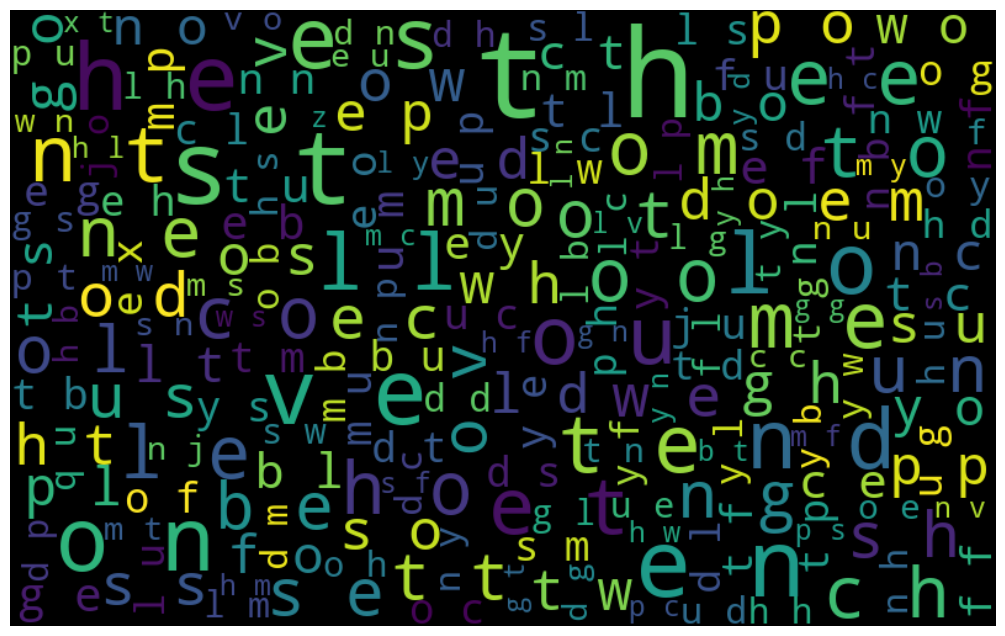

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

frequent words visualization for +ve

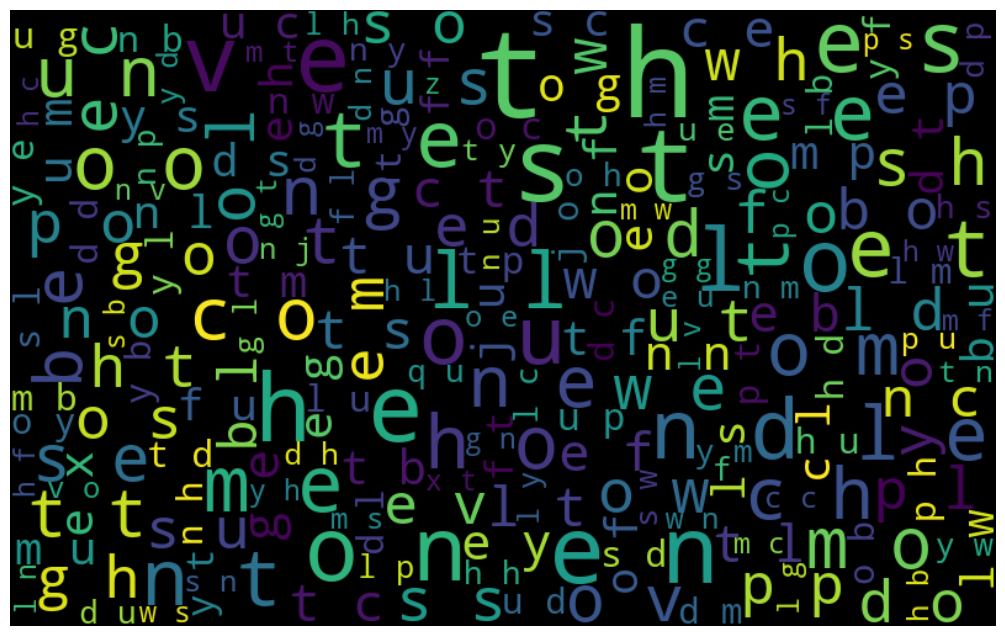

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

frequent words visualization for -ve

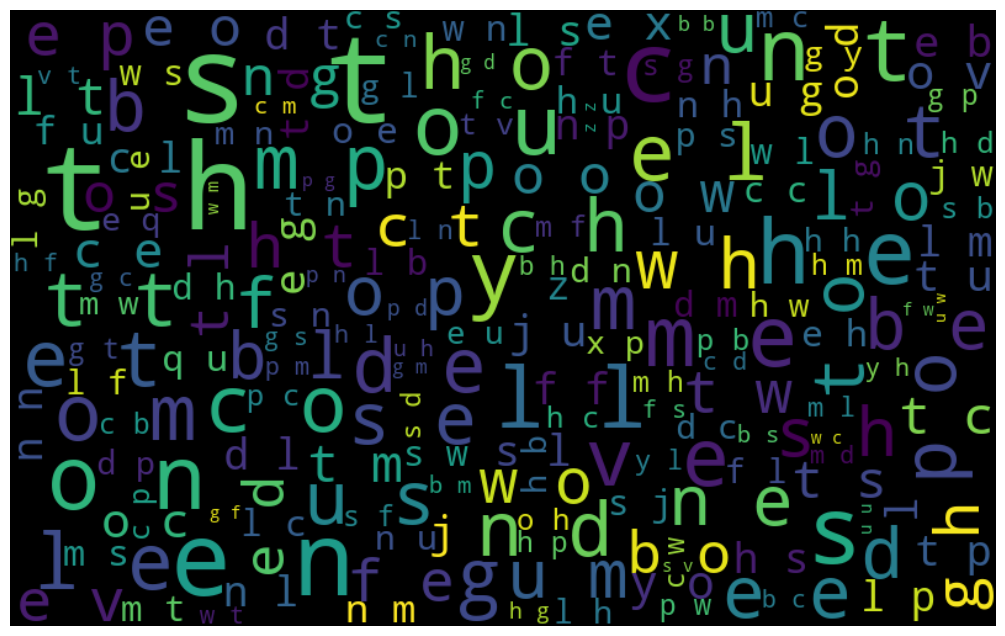

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Download the "nltk.twitter_samples" and resource

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

# Download the "nltk.stopwords" and resource

In [ ]:

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

concatenate the lists, 1st part is the positive tweets followed by the negative

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
str(train_y.shape)

'(8000, 1)'

In [ ]:
str(test_y.shape)

'(2000, 1)'

In [ ]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [ ]:
def build_freqs(tweets, ys):
    # tweets: a list of tweets
    # ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)

    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    # freqs: a dictionary mapping each (word, sentiment) pair to its frequency

    return freqs


create frequency dictionary

In [ ]:
freqs = build_freqs(tweets, labels)

dict

check data type

In [ ]:
type(freqs)

dict

check length of the dictionary

In [ ]:
{len(freqs)}

{13065}

In [ ]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific', 'hate', 'never', 'fuck', 'disgust', 'unfair']

In [ ]:
for keyword, count in most_common_keywords:
    keys.append(keyword)
keys

['happi',
 'merri',
 'nice',
 'good',
 'bad',
 'sad',
 'mad',
 'best',
 'pretti',
 '❤',
 ':)',
 ':(',
 '😒',
 '😬',
 '😄',
 '😍',
 '♛',
 'song',
 'idea',
 'power',
 'play',
 'magnific',
 'hate',
 'never',
 'fuck',
 'disgust',
 'unfair',
 'love',
 'day',
 'amp',
 'happy',
 'u',
 'time',
 'life',
 'today',
 'like',
 'new',
 'thankful',
 'positive',
 'get',
 'people',
 'good',
 'bihday',
 'one',
 'see',
 'ca',
 'smile',
 'go',
 'want',
 'take',
 'father',
 'work',
 'love',
 'day',
 'amp',
 'happy',
 'u',
 'time',
 'life',
 'today',
 'like',
 'new',
 'thankful',
 'positive',
 'get',
 'people',
 'good',
 'bihday',
 'one',
 'see',
 'ca',
 'smile',
 'go',
 'want',
 'take',
 'father',
 'work']

each element consist of a sublist with this pattern: [word, positive_count, negative_count]

In [ ]:
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

In [ ]:
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0],
 ['hate', 13, 57],
 ['never', 36, 57],
 ['fuck', 26, 58],
 ['disgust', 1, 6],
 ['unfair', 0, 7],
 ['love', 400, 152],
 ['day', 246, 149],
 ['amp', 0, 0],
 ['happy', 0, 0],
 ['u', 175, 193],
 ['time', 127, 166],
 ['life', 49, 33],
 ['today', 108, 108],
 ['like', 233, 228],
 ['new', 143, 51],
 ['thankful', 0, 0],
 ['positive', 0, 0],
 ['get', 206, 232],
 ['people', 0, 0],
 ['good', 238, 101],
 ['bihday', 0, 0],
 ['one', 129, 148],
 ['see', 184, 124],
 ['ca', 1, 0],
 ['smile', 62, 10],
 ['go', 148, 224],
 ['want', 96, 246],
 ['take', 43, 49],
 ['father', 0, 2],
 ['work', 110, 133],
 ['love', 400, 152],
 

# Visualize

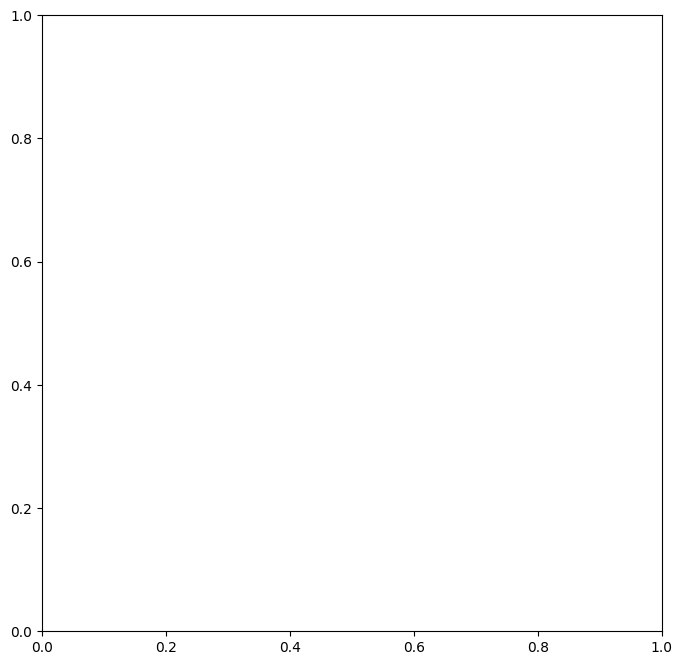

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)

In [ ]:
x = np.log([x[1] + 1 for x in data])

do the same for the negative counts

In [ ]:
y = np.log([x[2] + 1 for x in data])

Plot a dot for each pair of words

In [ ]:
ax.scatter(x, y)

assign axis labels

Text(0, 0.5, 'Log Negative count')

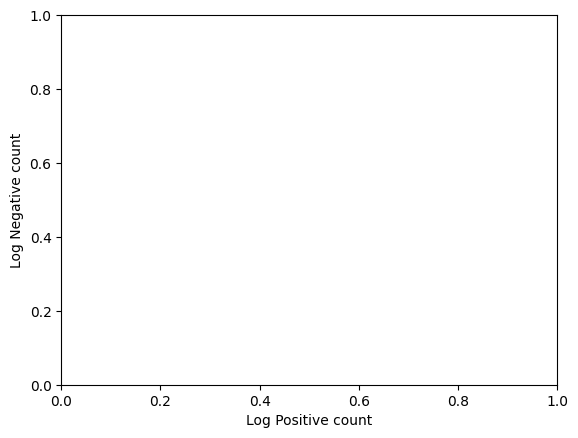

In [ ]:
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

Add the word as the label at the same position as you added the points just before

In [ ]:
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

Plot the red line that divides the 2 areas.

In [ ]:
ax.plot([0, 9], [0, 9], color='red')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


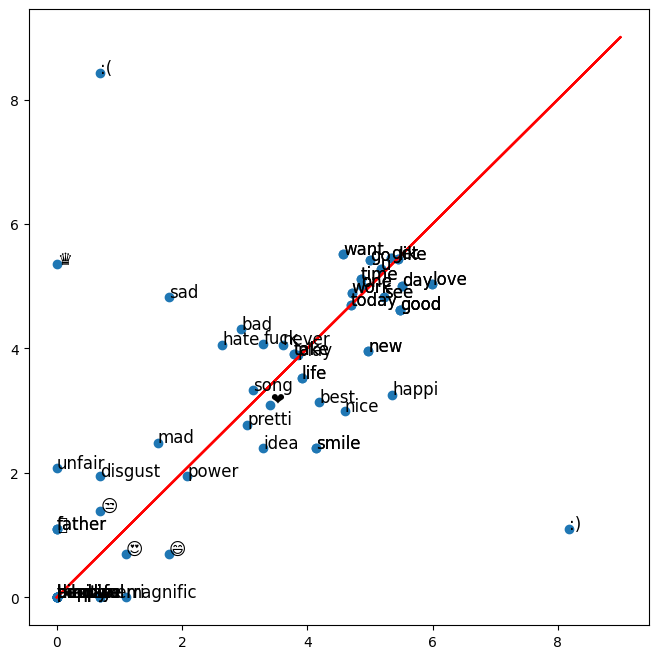

In [ ]:
fig

In [ ]:
freqs = build_freqs(train_x, train_y)

 check the output

In [ ]:
str(len(freqs.keys()))

'11337'

In [ ]:
str(type(freqs))

"<class 'dict'>"

This is an example of a positive tweet:

In [ ]:
train_x[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

This is an example of the processed version of the tweet:

In [ ]:
process_tweet(train_x[0])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In [ ]:
def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h


In [ ]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]

    for i in range(0, num_iters):
        # get z, the dot product of x and theta
        z = np.dot(x, theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) / m

        # update the weights theta
        theta = theta - alpha * (np.dot(x.T, h - y)) / m

    J = np.mean(-y.T * np.log(h) - (1 - y).T * np.log(1 - h))

    return J, theta

In [ ]:
def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    # bias term is set to 1
    x[0, 0] = 1

    # loop through each word in the list of words
    for word in word_l:

        if (word, 1.0) in freqs:
            # increment the word count for the positive label 1
            x[0, 1] += freqs[(word, 1.0)]
        if (word, 0.0) in freqs:
            # increment the word count for the negative label 0
            x[0, 2] += freqs[(word, 0.0)]

    return x

In [ ]:
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

collect the features 'x' and stack them into a matrix 'X'

In [ ]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

training labels corresponding to X

In [ ]:
Y = train_y

Apply gradient descent

In [ ]:
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

# Visualize

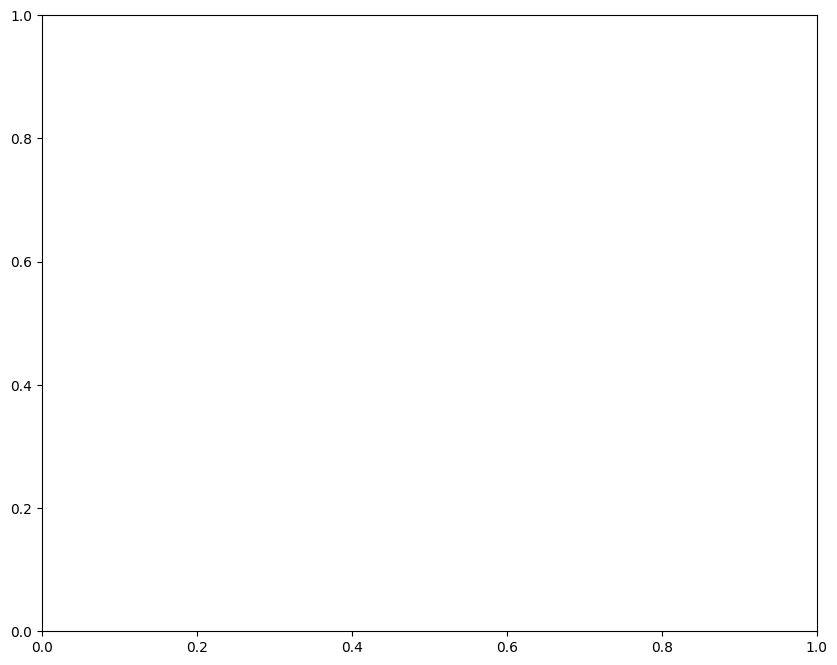

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

In [ ]:
colors = ['red', 'green']

Color base on the sentiment Y

In [ ]:
ax.scatter(X[:, 1].flatten(), X[:, 2].flatten(), c=[colors[int(k[0])] for k in Y], s=0.1)

Text(0, 0.5, 'Negative')

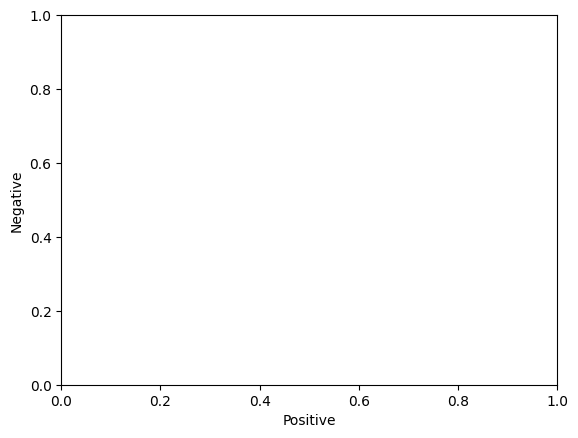

In [ ]:
plt.xlabel("Positive")
plt.ylabel("Negative")

Now lets represent the logistic regression model in this chart.

In [ ]:
maxpos = np.max(X[:, 1])  # max value in x-axis

Plot a gray line that divides the 2 areas.

In [ ]:
ax.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color='gray')

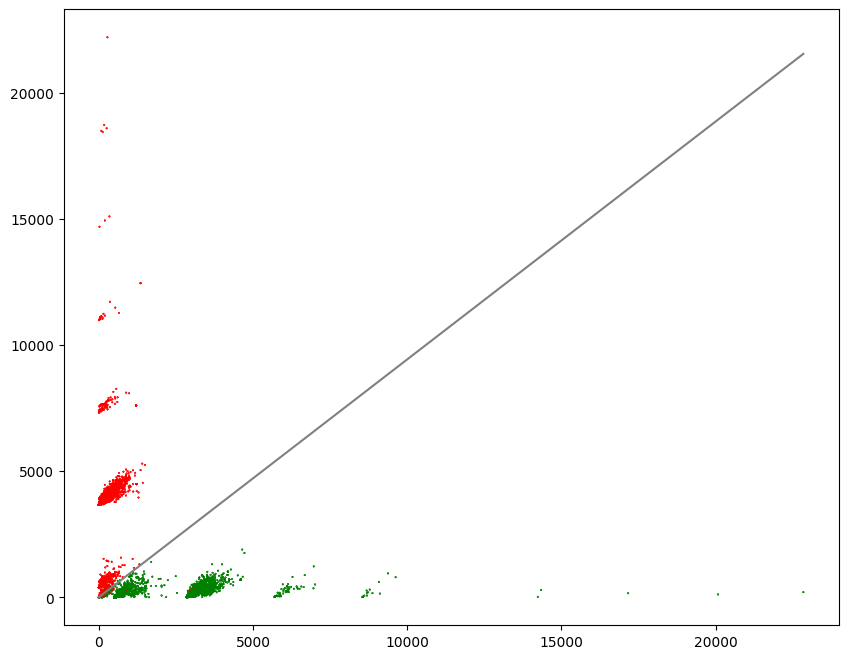

In [ ]:
fig

# Extract communities

Extract usernames from tweet text

In [ ]:
df['mentioned_users'] = df['tweet'].str.findall(r'@(\w+)')

Create a dictionary to store the communities

In [ ]:
communities = {}

Iterate over each row in the dataframe

In [ ]:
for _, row in df.iterrows():
    username = row['username']

    # Add the username to its own community if not already present
    if username not in communities:
        communities[username] = set()

    # Add mentioned users to the same community as the username
    for mentioned_user in row['mentioned_users']:
        communities[username].add(mentioned_user)


Count the size of each community

In [ ]:
community_sizes = {username: len(community) for username, community in communities.items()}

Output community sizes for each node

In [ ]:
community_sizes

{'@dUnGUzgB': 35,
 '@py8K4gKz': 30,
 '@IlS0vUZH': 20,
 '@pacq5VnZ': 20,
 '@fJhofnE6': 22,
 '@HF86N0wj': 20,
 '@T8J0KJ4M': 26,
 '@wkMFolU4': 21,
 '@VTESWx1C': 18,
 '@0jZoe6gH': 25,
 '@xT5qHu61': 20,
 '@R6DDIX3d': 16,
 '@TrEKgyCb': 21,
 '@D77D7GUW': 25,
 '@z1ciuHYV': 22,
 '@dAD88mjY': 21,
 '@aDe3Kmc0': 27,
 '@0pdoOw4e': 21,
 '@xLWMA05T': 22,
 '@lqXj7sZJ': 25,
 '@VERuDEyn': 23,
 '@feJRbj5h': 15,
 '@7CM6MpIv': 22,
 '@Odf0UvtO': 26,
 '@epZqPq4n': 22,
 '@Y1K3cSdG': 23,
 '@VCzVk6zA': 18,
 '@ln6zY6QB': 22,
 '@9uMXgChD': 25,
 '@dxx1yRNY': 21,
 '@VqARiKJK': 28,
 '@Au1Ew66T': 18,
 '@ZTwTHjLZ': 19,
 '@tlOSOab4': 20,
 '@JoXjpvQc': 18,
 '@YAM5eUje': 25,
 '@uLou0YAl': 26,
 '@tpzZu82z': 18,
 '@sbIj5moY': 14,
 '@29ziPI8x': 21,
 '@HEXJE3nH': 23,
 '@xZGUxrKE': 28,
 '@KY7Y3W5r': 27,
 '@N0iXUgdQ': 31,
 '@ZhP8FY1P': 18,
 '@LxE2s3Aw': 22,
 '@i5SBe0Tg': 24,
 '@fU7GhOw2': 29,
 '@wJlMo7S6': 1,
 '@ddeVryG8': 25,
 '@pjXb70LT': 25,
 '@0jZbe6gH': 0,
 '@X8l82pOg': 15,
 '@15PDjIJx': 28,
 '@qhqYSDGk': 20,
 '@PXdspEmy'

Sort communities by size in descending order

In [ ]:
sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)

Top 20 communities with the most users:

In [ ]:
sorted_communities[:20]

[('@AcfXJJSx', 37),
 ('@1hu6MIE6', 37),
 ('@PXdXpEmy', 36),
 ('@dUnGUzgB', 35),
 ('@zZ9S5acL', 34),
 ('@bVc5Hp5D', 32),
 ('@gIAv4Pk7', 32),
 ('@AfS9Sd8K', 32),
 ('@N0iXUgdQ', 31),
 ('@k60HAlib', 31),
 ('@TwWuwqXv', 31),
 ('@25HOYWhP', 31),
 ('@NdQ12tvl', 31),
 ('@yFnq1gmr', 31),
 ('@oO0jn4Wv', 31),
 ('@py8K4gKz', 30),
 ('@rcBW2FTz', 30),
 ('@H2cP67gB', 30),
 ('@IkZM5fm4', 30),
 ('@woGSoSd1', 30)]